<h1 align="center">Regresor para aplicaciones moviles</h1>

<h2>Indice</h2>
<ol>
    <li>Librerias</li>
    <li>Conjunto de Datos</li>
    <li>Preprocesamiento
        <ol>
            <li>Renombrar Caracteristicas</li>
            <li>Eliminar Caracteristicas</li>
          <li>Eliminar Registros</li>
            <li>Conversión de Datos</li> <!-- estos dos ultimos pueden ser que cambien de orden-->
        </ol>
    </li>
    <li>Procesamiento </li>
  <li>Aprendizaje de Algoritmos</li>
</ol>

<h1>Librerias</h1>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR


from sklearn.model_selection import cross_val_score

from google.colab import files
from IPython.display import Image


%matplotlib inline

<h1 id="uno"> CONJUNTO DE DATOS </h1>

Dirección del conjunto de datos original: https://www.kaggle.com/lava18/google-play-store-apps

El conjunto de datos original tiene 13 caracteristicas con 10841 registros.

In [0]:
uploaded = files.upload()

Saving app.csv.zip to app.csv.zip


In [0]:
!unzip app.csv.zip

Archive:  app.csv.zip
replace googleplaystore.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: googleplaystore.csv     


In [0]:
d = pd.read_csv('app.csv.zip')

In [0]:
d

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [0]:
d.shape

(10841, 13)

<h1>Preprocesaminto</h1>

<h2><li> Renombrar Caracteristicas </li></h2>

Para facilitar la implementación del conjunto de datos se arreglaron los nombres y se tradujeron al español. 

In [0]:
d = d.rename(columns={'App':'nombre','Category': 'categoria','Rating':'calificacion','Reviews':'comentarios','Size':'tamanio',
                      'Installs':'instalaciones','Type':'tipo','Price':'precio','Content Rating':'clasificacion',
                      'Genres':'genero','Last Updated':'ult_act','Current Ver':'v_actual','Android Ver':'v_android'})

In [0]:
d.columns

Index([u'nombre', u'categoria', u'calificacion', u'comentarios', u'tamanio',
       u'instalaciones', u'tipo', u'precio', u'clasificacion', u'genero',
       u'ult_act', u'v_actual', u'v_android'],
      dtype='object')

<h2><li> Eliminación de Caracteristicas.</li> </h2>

Siguiendo el objetivo del modelo, son innecesarias las siguientes caracteristicas:
<!--- - instalaciones.-->
- nombre
- instalaciones
- ult_act.
- v_actual.
- comentarios

In [0]:
del d['nombre']
del d['instalaciones']
del d['ult_act']
del d['v_actual']
del d['comentarios']

In [0]:
col = list(d.columns.values)
col

['categoria',
 'calificacion',
 'tamanio',
 'tipo',
 'precio',
 'clasificacion',
 'genero',
 'v_android']

Cambiamos el prden de las columnas, para ubicar la caracteristica de la calificación de ultima

In [0]:
d = d[['categoria','tamanio','tipo','precio','clasificacion','genero','v_android','calificacion']]

Sacamos la columna <i>nombre</i> del conjunto de datos 

<h2><li>Eliminación de Registros</li></h2>

Calculamos la cantidad y porcentaje de los datos nulos por cada una de las caracteristicas

In [0]:
cantidad = d.isnull().sum().sort_values(ascending=False)
porcentaje = (d.isnull().sum()/d.isnull().count()).sort_values(ascending=False)
datos_nulos = pd.concat([cantidad, porcentaje], axis=1, keys=['Cantidad', 'Porcentaje'])
datos_nulos

,Cantidad,Porcentaje
calificacion,1474,0.135965
v_android,3,0.000277
clasificacion,1,0.000092
tipo,1,0.000092
genero,0,0.000000
precio,0,0.000000
tamanio,0,0.000000
categoria,0,0.000000


In [0]:
d[d.calificacion.isnull()]

,categoria,tamanio,tipo,precio,clasificacion,genero,v_android,calificacion
23,ART_AND_DESIGN,7.0M,Free,0,Everyone,Art & Design;Action & Adventure,4.1 and up,NaN
113,BEAUTY,5.7M,Free,0,Everyone 10+,Beauty,3.0 and up,NaN
123,BEAUTY,3.7M,Free,0,Everyone,Beauty,4.1 and up,NaN
126,BEAUTY,7.4M,Free,0,Teen,Beauty,4.1 and up,NaN
129,BEAUTY,2.9M,Free,0,Mature 17+,Beauty,2.3 and up,NaN
130,BEAUTY,3.1M,Free,0,Everyone 10+,Beauty,3.0 and up,NaN
134,BEAUTY,9.9M,Free,0,Mature 17+,Beauty,3.0 and up,NaN
163,BOOKS_AND_REFERENCE,2.7M,Free,0,Everyone,Books & Reference,2.3 and up,NaN
180,BOOKS_AND_REFERENCE,7.2M,Free,0,Everyone,Books & Reference,6.0 and up,NaN
185,BOOKS_AND_REFERENCE,7.3M,Free,0,Everyone,Books & Reference,5.1 and up,NaN


Eliminamos los registros que contienen datos nulos

In [0]:
d.dropna(how ='any', inplace = True)
d.shape

(9364, 8)

In [0]:
cantidad = d.isnull().sum().sort_values(ascending=False)
porcentaje = (d.isnull().sum()/d.isnull().count()).sort_values(ascending=False)
datos_nulos = pd.concat([cantidad, porcentaje], axis=1, keys=['Cantidad', 'Porcentaje'])
datos_nulos

,Cantidad,Porcentaje
calificacion,0,0.0
v_android,0,0.0
genero,0,0.0
clasificacion,0,0.0
precio,0,0.0
tipo,0,0.0
tamanio,0,0.0
categoria,0,0.0


<h2><li> Conversión de Datos</li></h2>

Para poder analizar los datos, los diferentes tipos de datos de cada caracteristica se renombraran con un respectivo numero para poder mapearlos.




In [0]:
def conversion(s):
    l = d[s].unique()
    val_antiguo = l
    val_nuevo = range(len(l))
    a = pd.DataFrame()
    a['valor antiguo'] = val_antiguo
    a['valor nuevo'] = val_nuevo
    for i in range(len(l)):
        d[s] = d[s].replace(val_antiguo[i], i+1)
    return d

<h3><li>Categoria</li></h3>

<table>
    <th colspan=6><center>categoria</center></th>
    <tr>
        <td>ART_AND_DESIGN</td>
        <td>1</td>
        <td>FAMILY</td>
        <td>12</td>
        <td>PARENTING</td>
        <td>23</td>
    </tr>
    <tr>
        <td>AUTO_AND_VEHICLES</td>
        <td>2</td>
        <td>FINANCE</td>
        <td>13</td>
        <td>PERSONALIZATION</td>
        <td>24</td>
    </tr>
    <tr>
        <td>BEAUTY</td>
        <td>3</td>
        <td>FOOD_AND_DRINK</td>
        <td>14</td>
        <td>PHOTOGRAPHY</td>
        <td>25</td>
    </tr>
    <tr>
        <td>BOOKS_AND_REFERENCE</td>
        <td>4</td>
        <td>GAME</td>
        <td>15</td>
        <td>PRODUCTIVITY</td>
        <td>26</td>
    </tr>
    <tr>
        <td>BUSINESS</td>
        <td>5</td>
        <td>HEALTH_AND_FITNESS</td>
        <td>16</td>
        <td>SHOPPING</td>
        <td>27</td>
    </tr>
    <tr>
        <td>COMICS</td>
        <td>6</td>
        <td>HOUSE_AND_HOME</td>
        <td>17</td>
        <td>SOCIAL</td>
        <td>28</td>
    </tr>
    <tr>
        <td>COMMUNICATION</td>
        <td>7</td>
        <td>LIBRARIES_AND_DEMO</td>
        <td>18</td>
        <td>SPORTS</td>
        <td>29</td>
    </tr>
    <tr>
        <td>DATING</td>
        <td>8</td>
        <td>LIFESTYLE</td>
        <td>19</td>
        <td>TOOLS</td>
        <td>30</td>
    </tr>
    <tr>
        <td>EDUCATION</td>
        <td>9</td>
        <td>MAPS_AND_NAVIGATION</td>
        <td>20</td>
        <td>TRAVEL_AND_LOCAL</td>
        <td>31</td>
    </tr>
    <tr>
        <td>ENTERTAINMENT</td>
        <td>10</td>
        <td>MEDICAL</td>
        <td>21</td>
        <td>VIDEO_PLAYERS</td>
        <td>32</td>
    </tr>
    <tr>
        <td>EVENTS</td>
        <td>11</td>
        <td>NEWS_AND_MAGAZINES</td>
        <td>22</td>
        <td>WEATHER</td>
        <td>33</td>
    </tr>
</table>

In [0]:
conversion('categoria')

,categoria,tamanio,tipo,precio,clasificacion,genero,v_android,calificacion
0,1,19M,Free,0,Everyone,Art & Design,4.0.3 and up,4.1
1,1,14M,Free,0,Everyone,Art & Design;Pretend Play,4.0.3 and up,3.9
2,1,8.7M,Free,0,Everyone,Art & Design,4.0.3 and up,4.7
3,1,25M,Free,0,Teen,Art & Design,4.2 and up,4.5
4,1,2.8M,Free,0,Everyone,Art & Design;Creativity,4.4 and up,4.3
5,1,5.6M,Free,0,Everyone,Art & Design,2.3 and up,4.4
6,1,19M,Free,0,Everyone,Art & Design,4.0.3 and up,3.8
7,1,29M,Free,0,Everyone,Art & Design,4.2 and up,4.1
8,1,33M,Free,0,Everyone,Art & Design,3.0 and up,4.4
9,1,3.1M,Free,0,Everyone,Art & Design;Creativity,4.0.3 and up,4.7


<h3><li>Tamanio</li></h3>
<p> Pasamos los datos a numeros flotantes que representan el tamaño en megabytes </p>

In [0]:
d['tamanio'] = d['tamanio'].apply(lambda x: str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else x)
d['tamanio'] = d['tamanio'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
d['tamanio'] = d['tamanio'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
d['tamanio'] = d['tamanio'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
d['tamanio'] = d['tamanio'].apply(lambda x: float(x))

d.head()

,categoria,tamanio,tipo,precio,clasificacion,genero,v_android,calificacion
0,1,19.0,Free,0,Everyone,Art & Design,4.0.3 and up,4.1
1,1,14.0,Free,0,Everyone,Art & Design;Pretend Play,4.0.3 and up,3.9
2,1,8.7,Free,0,Everyone,Art & Design,4.0.3 and up,4.7
3,1,25.0,Free,0,Teen,Art & Design,4.2 and up,4.5
4,1,2.8,Free,0,Everyone,Art & Design;Creativity,4.4 and up,4.3


<h3><li>Tipo</li></h3>

<table>
    <th colspan=4><center>tipo</center></th>
    <tr>
        <td>Free</td>
        <td>0</td>
        <td>Paid</td>
        <td>1</td>
    </tr>
</table>

In [0]:
d[d.tipo.isnull()]

,categoria,tamanio,tipo,precio,clasificacion,genero,v_android,calificacion


In [0]:
conversion('tipo')

,categoria,tamanio,tipo,precio,clasificacion,genero,v_android,calificacion
0,1,19.000,1,0,Everyone,Art & Design,4.0.3 and up,4.1
1,1,14.000,1,0,Everyone,Art & Design;Pretend Play,4.0.3 and up,3.9
2,1,8.700,1,0,Everyone,Art & Design,4.0.3 and up,4.7
3,1,25.000,1,0,Teen,Art & Design,4.2 and up,4.5
4,1,2.800,1,0,Everyone,Art & Design;Creativity,4.4 and up,4.3
5,1,5.600,1,0,Everyone,Art & Design,2.3 and up,4.4
6,1,19.000,1,0,Everyone,Art & Design,4.0.3 and up,3.8
7,1,29.000,1,0,Everyone,Art & Design,4.2 and up,4.1
8,1,33.000,1,0,Everyone,Art & Design,3.0 and up,4.4
9,1,3.100,1,0,Everyone,Art & Design;Creativity,4.0.3 and up,4.7


In [0]:
d['tipo'].unique()

array([1, 2])

<h3><li>Precio</li></h3>

In [0]:
d['precio'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [0]:
d['precio'] = d['precio'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)
d['precio'] = d['precio'].apply(lambda x: float(x))

In [0]:
d['precio'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

<h3><li>Clasificacion</li></h3>

In [0]:
d['clasificacion'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

<table>
    <th colspan=6><center>clasificacion</center></th>
    <tr>
        <td>Adults only 18+</td>
        <td>1</td>
        <td>Everyone 10+</td>
        <td>3</td>
        <td>Teen</td>
        <td>5</td>
    </tr>
    <tr>
        <td>Everyone</td>
        <td>2</td>
        <td>Mature 17+</td>
        <td>4</td>
        <td>Unrated</td>
        <td>6</td>
    </tr>
</table>

In [0]:
conversion('clasificacion')

,categoria,tamanio,tipo,precio,clasificacion,genero,v_android,calificacion
0,1,19.000,1,0.0,1,Art & Design,4.0.3 and up,4.1
1,1,14.000,1,0.0,1,Art & Design;Pretend Play,4.0.3 and up,3.9
2,1,8.700,1,0.0,1,Art & Design,4.0.3 and up,4.7
3,1,25.000,1,0.0,2,Art & Design,4.2 and up,4.5
4,1,2.800,1,0.0,1,Art & Design;Creativity,4.4 and up,4.3
5,1,5.600,1,0.0,1,Art & Design,2.3 and up,4.4
6,1,19.000,1,0.0,1,Art & Design,4.0.3 and up,3.8
7,1,29.000,1,0.0,1,Art & Design,4.2 and up,4.1
8,1,33.000,1,0.0,1,Art & Design,3.0 and up,4.4
9,1,3.100,1,0.0,1,Art & Design;Creativity,4.0.3 and up,4.7


In [0]:
d['clasificacion'].unique()

array([1, 2, 3, 4, 5, 6])

<h3><li>Genero</li></h3>

In [0]:
d['genero'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

<table>
    <th colspan=8><center>genero<center></th>
    <tr>
        <td>Action</td> <td>1</td> <td>Casual;Creativity</td> <td>31</td> <td>Finance</td> <td>61</td> <td>Racing;Pretend Play</td> <td>91</td>
    </tr>
    <tr>
        <td>Action;Action & Adventure</td> <td>2</td> <td>Casual;Education</td> <td>32</td> <td>Food & Drink</td> <td>61</td> <td>Role Playing</td> <td>92</td>
    </tr>
    <tr>
        <td>Adventure</td> <td>3</td> <td>Casual;Music & Video</td> <td>33</td> <td>Health & Fitness</td> <td>63</td> <td>Role Playing;Action & Adventure</td> <td>93</td>
    </tr>
    <tr>
        <td>Adventure;Action & Adventure</td> <td>4</td> <td>Casual;Pretend Play</td> <td>34</td> <td>Racing</td> <td>64</td> <td>Role Playing;Brain Games</td> <td>94</td>
    </tr>
    <tr>
        <td>Adventure;Brain Games</td> <td>5</td> <td>Comics</td> <td>35</td> <td>Health & Fitness;Action & Adventure</td> <td>65</td> <td>Role Playing;Education</td> <td>95</td>
    </tr>
    <tr>
        <td>Adventure;Education</td> <td>6</td> <td>Comics;Creativity</td> <td>36</td> <td>Health & Fitness;Education</td> <td>66</td> <td>Role Playing;Pretend Play</td> <td>96</td>
    </tr>
    <tr>
        <td>Arcade</td> <td>7</td> <td>Communication</td> <td>37</td> <td>House & Home</td> <td>67</td> <td>Shopping</td> <td>97</td>
    </tr>
    <tr>
        <td>Arcade;Action & Adventure</td> <td>8</td> <td>Communication;Creativity</td> <td>38</td> <td>Libraries & Demo</td> <td>68</td> <td>Simulation</td> <td>98</td>
    </tr>
    <tr>
        <td>Arcade;Pretend Play</td> <td>9</td> <td>Dating</td> <td>39</td> <td>Lifestyle</td> <td>69</td> <td>Simulation;Action & Adventure</td> <td>99</td>
    </tr>
    <tr>
        <td>Art & Design</td> <td>10</td> <td>Education</td> <td>40</td> <td>Lifestyle;Education</td> <td>70</td> <td>Simulation;Education</td> <td>100</td>
    </tr>
    <tr>
        <td>Art & Design;Action & Adventure</td> <td>11</td> <td>Education;Action & Adventure</td> <td>41</td> <td>Lifestyle;Pretend Play</td> <td>71</td> <td>Simulation;Pretend Play</td> <td>101</td>
    </tr>
    <tr>
        <td>Art & Design;Creativity</td> <td>12</td> <td>Education;Brain Games</td> <td>42</td> <td>Maps & Navigation</td> <td>72</td> <td>Social</td> <td>102</td>
    </tr>
    <tr>
        <td>Art & Design;Pretend Play</td> <td>13</td> <td>Education;Creativity</td> <td>43</td> <td>Medical</td> <td>73</td> <td>Sports</td> <td>103</td>
    </tr>
    <tr>
        <td>Auto & Vehicles</td> <td>14</td> <td>Education;Education</td> <td>44</td> <td>Music</td> <td>74</td> <td>Strategy</td> <td>104</td>
    </tr>
    <tr>
        <td>Beauty</td> <td>15</td> <td>Education;Music & Video</td> <td>45</td> <td>Music & Audio;Music & Video</td> <td>75</td> <td>Strategy;Action & Adventure</td> <td>105</td>
    </tr>
    <tr>
        <td>Board</td> <td>16</td> <td>Education;Pretend Play</td> <td>46</td> <td>Music;Music & Video</td> <td>76</td> <td>Strategy;Creativity</td> <td>106</td>
    </tr>
    <tr>
        <td>Board;Action & Adventure</td> <td>17</td> <td>Educational</td> <td>47</td> <td>News & Magazines</td> <td>77</td> <td>Strategy;Education</td> <td>107</td>
    </tr>
    <tr>
        <td>Board;Brain Games</td> <td>18</td> <td>Educational;Action & Adventure</td> <td>48</td> <td>Parenting</td> <td>78</td> <td>Tools</td> <td>108</td>
    </tr>
    <tr>
        <td>Board;Pretend Play</td> <td>19</td> <td>Educational;Brain Games</td> <td>49</td> <td>Parenting;Brain Games</td> <td>79</td> <td>Tools;Education</td> <td>109</td>
    </tr>
    <tr>
        <td>Books & Reference</td> <td>20</td> <td>Educational;Creativity</td> <td>50</td> <td>Parenting;Education</td> <td>80</td> <td>Travel & Local</td> <td>110</td>
    </tr>
    <tr>
        <td>Books & Reference;Creativity</td> <td>21</td> <td>Educational;Education</td> <td>51</td> <td>Parenting;Music & Video</td> <td>81</td> <td>Travel & Local;Action & Adventure</td> <td>111</td>
    </tr>
    <tr>
        <td>Books & Reference;Education</td> <td>22</td> <td>Educational;Pretend Play</td> <td>52</td> <td>Personalization</td> <td>82</td> <td>Trivia</td> <td>112</td>
    </tr>
    <tr>
        <td>Business</td> <td>23</td> <td>Entertainment</td> <td>53</td> <td>Photography</td> <td>83</td> <td>Trivia;Education</td> <td>113</td>
    </tr>
    <tr>
        <td>Card</td> <td>24</td> <td>Entertainment;Action & Adventure</td> <td>54</td> <td>Productivity</td> <td>84</td> <td>Video Players & Editors</td> <td>114</td>
    </tr>
    <tr>
        <td>Card;Action & Adventure</td> <td>25</td> <td>Entertainment;Brain Games</td> <td>55</td> <td>Puzzle</td> <td>85</td> <td>Video Players & Editors;Creativity</td> <td>115</td>
    </tr>
    <tr>
        <td>Card;Brain Games</td> <td>26</td> <td>Entertainment;Creativity</td> <td>56</td> <td>Puzzle;Action & Adventure</td> <td>86</td> <td>Video Players & Editors;Music & Video</td> <td>116</td>
    </tr>
    <tr>
        <td>Casino</td> <td>27</td> <td>Entertainment;Education</td> <td>57</td> <td>Puzzle;Brain Games</td> <td>87</td> <td>Weather</td> <td>117</td>
    </tr>
    <tr>
        <td>Casual</td> <td>28</td> <td>Entertainment;Music & Video</td> <td>58</td> <td>Puzzle;Creativity</td> <td>88</td> <td>Word</td> <td>118</td>
    </tr>
    <tr>
        <td>Casual;Action & Adventure</td> <td>29</td> <td>Entertainment;Pretend Play</td> <td>59</td> <td>Puzzle;Education</td> <td>89</td> <td></td> <td>119</td>
    </tr>
    <tr>
        <td>Casual;Brain Games</td> <td>30</td> <td>Events</td> <td>60</td> <td>Racing;Action & Adventure</td> <td>90</td> <td></td> <td>120</td>
    </tr>
</table>

In [0]:
conversion('genero')

,categoria,tamanio,tipo,precio,clasificacion,genero,v_android,calificacion
0,1,19.000,1,0.0,1,1,4.0.3 and up,4.1
1,1,14.000,1,0.0,1,2,4.0.3 and up,3.9
2,1,8.700,1,0.0,1,1,4.0.3 and up,4.7
3,1,25.000,1,0.0,2,1,4.2 and up,4.5
4,1,2.800,1,0.0,1,3,4.4 and up,4.3
5,1,5.600,1,0.0,1,1,2.3 and up,4.4
6,1,19.000,1,0.0,1,1,4.0.3 and up,3.8
7,1,29.000,1,0.0,1,1,4.2 and up,4.1
8,1,33.000,1,0.0,1,1,3.0 and up,4.4
9,1,3.100,1,0.0,1,3,4.0.3 and up,4.7


In [0]:
d['genero'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115])

<h3><li>Versión de Android</li></h3>

In [0]:
d['v_android'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

<table>
    <th><center>v_android</center></th>
</table>

In [0]:
conversion('v_android')

,categoria,tamanio,tipo,precio,clasificacion,genero,v_android,calificacion
0,1,19.000,1,0.0,1,1,1,4.1
1,1,14.000,1,0.0,1,2,1,3.9
2,1,8.700,1,0.0,1,1,1,4.7
3,1,25.000,1,0.0,2,1,2,4.5
4,1,2.800,1,0.0,1,3,3,4.3
5,1,5.600,1,0.0,1,1,4,4.4
6,1,19.000,1,0.0,1,1,1,3.8
7,1,29.000,1,0.0,1,1,2,4.1
8,1,33.000,1,0.0,1,1,5,4.4
9,1,3.100,1,0.0,1,3,1,4.7


In [0]:
d['v_android'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

,categoria,tamanio,tipo,precio,clasificacion,genero,v_android,calificacion
count,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000
mean,18.781397,18.947698,1.068988,0.960974,1.350064,50.801901,6.433789,4.191702
std,7.331048,23.015374,0.253447,15.818270,0.783418,34.100538,4.015775,0.515260
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,15.000000,2.400000,1.000000,0.000000,1.000000,20.000000,3.000000,4.000000
50%,19.000000,9.500000,1.000000,0.000000,1.000000,39.000000,6.000000,4.300000
75%,24.000000,27.000000,1.000000,0.000000,1.000000,89.000000,9.000000,4.500000
max,33.000000,100.000000,2.000000,400.000000,6.000000,115.000000,31.000000,5.000000


Guardamos el dataframe resultante en un archivo CSV

In [0]:
d.to_csv('d_preprocesado.csv', header=True, index=False)

In [0]:
uploaded = files.download('d_preprocesado.csv')

<h1>Procesaminto</h1>

Caracteristicas basicas del conjunto de datos resultantes:

In [4]:
uploaded = files.upload()

Saving d_preprocesado.csv to d_preprocesado.csv


In [0]:
dp = pd.read_csv('d_preprocesado.csv')
dp

In [6]:
dp.describe()

,categoria,tamanio,tipo,precio,clasificacion,genero,v_android,calificacion
count,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000,9364.000000
mean,18.781397,18.947698,1.068988,0.960974,1.350064,50.801901,6.433789,4.191702
std,7.331048,23.015374,0.253447,15.818270,0.783418,34.100538,4.015775,0.515260
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,15.000000,2.400000,1.000000,0.000000,1.000000,20.000000,3.000000,4.000000
50%,19.000000,9.500000,1.000000,0.000000,1.000000,39.000000,6.000000,4.300000
75%,24.000000,27.000000,1.000000,0.000000,1.000000,89.000000,9.000000,4.500000
max,33.000000,100.000000,2.000000,400.000000,6.000000,115.000000,31.000000,5.000000


Graficamos el histograma de todas las caracteristicas.

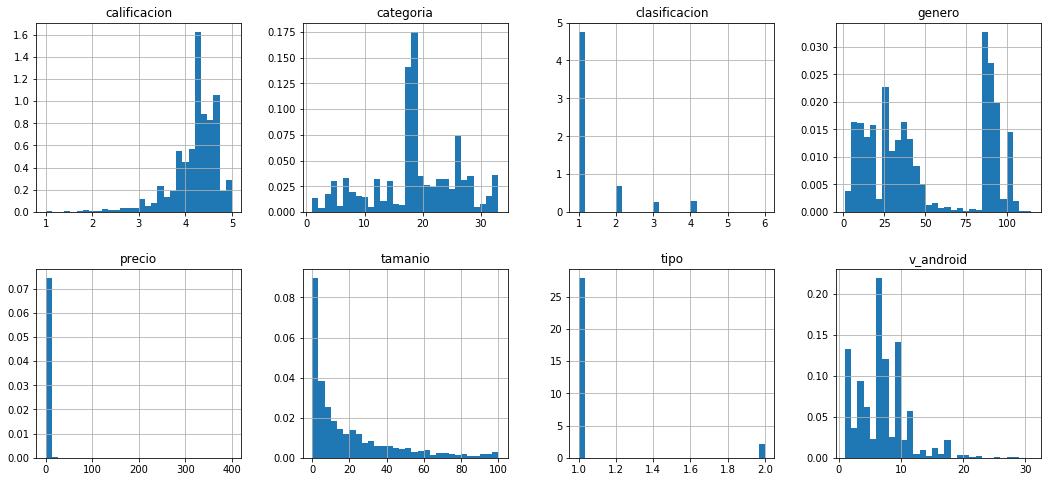

In [24]:
dp.hist(bins=30, density=True, figsize=(18,8), layout=(2,4));

Mapeamos todas las caracteristicas para ver si hay correlaciones entre ellas

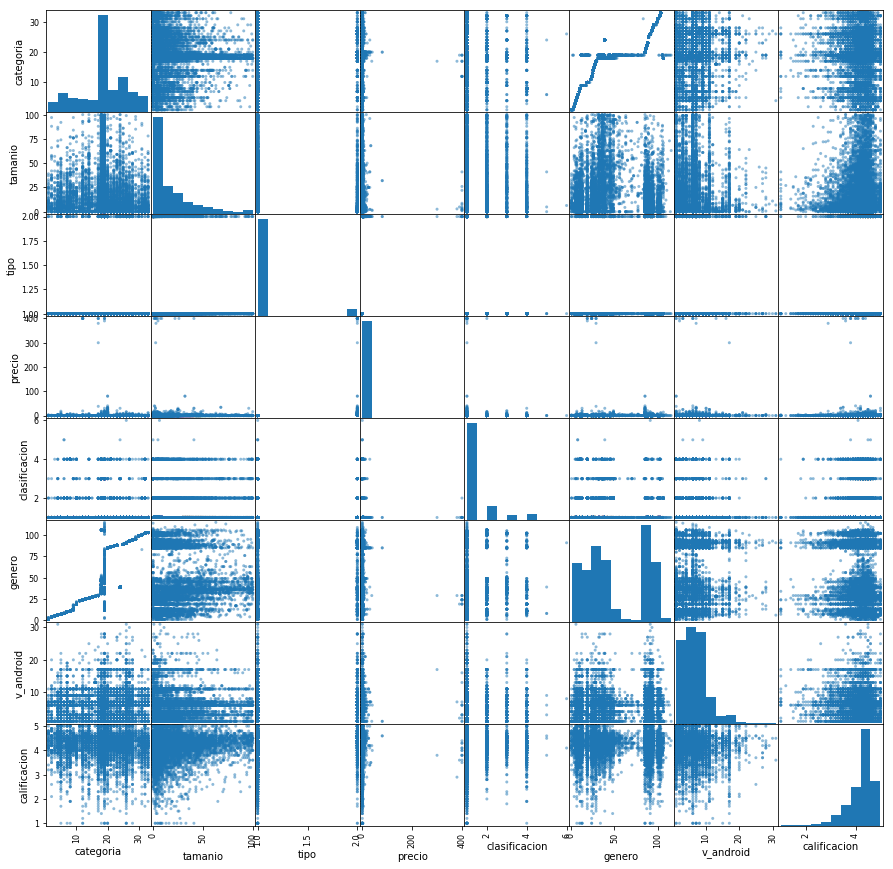

In [0]:
pd.plotting.scatter_matrix(d, figsize=(15,15));

Como se ve en la grafica, no se detallan correlaciones entre las caracteristicas

Antes de avanzar hay que analizar la cantidad de datos que hay para cada clase, para ir pensando en el entrenamiento de los modelos de regresión

In [9]:
n = pd.DataFrame(dp.groupby('calificacion').agg('count').categoria)
print n.shape
n

(39, 1)


,categoria
calificacion,
1.0,16
1.2,1
1.4,3
1.5,3
1.6,4
1.7,8
1.8,8
1.9,13
2.0,12


Como se ve, las clases estan muy desbalanceadas y faltan las clases de 1.1 y 1.2

Realizamos una permutación al orden de los datos  para realizar las pruebas 

In [13]:
n = len(dp)/2
perm = np.random.permutation(len(dp))

d_perm = dp.reindex(np.random.permutation(dp.index))
d_perm

,categoria,tamanio,tipo,precio,clasificacion,genero,v_android,calificacion
410,7,0.000,1,0.00,1,10,9,4.2
4966,22,0.045,1,0.00,1,87,10,4.4
7926,31,41.000,1,0.00,1,100,1,3.5
7271,19,31.000,1,0.00,3,33,4,4.2
2566,22,18.000,1,0.00,1,87,17,4.2
6575,19,0.000,1,0.00,1,108,6,4.3
5321,18,24.000,1,0.00,1,32,8,4.7
2672,23,22.000,1,0.00,1,88,3,4.7
4544,27,4.500,2,1.99,1,93,15,4.0
2564,22,25.000,1,0.00,1,87,17,4.1


<h1>Aprendizaje de Algoritmos</h1>